In [1]:
import numpy as np # linear algebra
import pandas as pd

In [2]:
import io
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import matplotlib.pyplot as plt#visualization

In [3]:
df = pd.read_csv(r"../input/churndetection/churn-bigml-80.csv")
df['Churn'] = df['Churn'].replace({bool(True):1,bool(False):0})
df['International plan'] = df['International plan'].replace({'Yes':1,'No':0})
df['Voice mail plan'] = df['Voice mail plan'].replace({'Yes':1,'No':0})

df.head()


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


# MODEL PREDICTION 

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
from yellowbrick.classifier import DiscriminationThreshold
#splitting train and test data 
train,test = train_test_split(df,test_size = .25 ,random_state = 111)
X = df.drop(['State','Churn'],axis=1)
target_col = ['Churn']
##seperating dependent and independent variables
cols    = X.columns
train_X = train[cols]
train_Y = train[target_col]
test_X  = test[cols]
test_Y  = test[target_col]

    
def telecom_churn_prediction(algorithm,training_x,testing_x,
                             training_y,testing_y,cols,cf,threshold_plot) :
    
    #model
    algorithm.fit(training_x,training_y)
    predictions   = algorithm.predict(testing_x)
    probabilities = algorithm.predict_proba(testing_x)
    #coeffs
    import joblib
    joblib.dump(algorithm, 'model.sav')
    print('train complete')
    
    print (algorithm)
    print ("\n Classification report : \n",classification_report(testing_y,predictions))
    print ("Accuracy   Score : ",accuracy_score(testing_y,predictions))
    #confusion matrix
    conf_matrix = confusion_matrix(testing_y,predictions)
    #roc_auc_score
    model_roc_auc = roc_auc_score(testing_y,predictions) 
    print ("Area under curve : ",model_roc_auc,"\n")
    fpr,tpr,thresholds = roc_curve(testing_y,probabilities[:,1])
    print(conf_matrix )
    #plot confusion matrix
    trace1 = go.Heatmap(z = conf_matrix ,
                        x = ["Not churn","Churn"],
                        y = ["Not churn","Churn"],
                        showscale  = False,colorscale = "picnic",
                        name = "matrix")
    
    #plot roc curve
    trace2 = go.Scatter(x = fpr,y = tpr,
                        name = "Roc : " + str(model_roc_auc),
                        line = dict(color = ('rgb(22, 96, 167)'),width = 2))
    trace3 = go.Scatter(x = [0,1],y=[0,1],
                        line = dict(color = ('rgb(205, 12, 24)'),width = 2,
                        dash = 'dot'))
    
    
    
    #subplots
    fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                            subplot_titles=('Confusion Matrix',
                                            'Receiver operating characteristic'))
    
    fig.append_trace(trace1,1,1)
    fig.append_trace(trace2,1,2)
    fig.append_trace(trace3,1,2)
    
    
    fig['layout'].update(showlegend=False, title="Model performance" ,
                         autosize = False,height = 900,width = 800,
                         plot_bgcolor = 'rgba(240,240,240, 0.95)',
                         paper_bgcolor = 'rgba(240,240,240, 0.95)',
                         margin = dict(b = 195))
    fig["layout"]["xaxis2"].update(dict(title = "false positive rate"))
    fig["layout"]["yaxis2"].update(dict(title = "true positive rate"))
    fig["layout"]["xaxis3"].update(dict(showgrid = True,tickfont = dict(size = 10),
                                        tickangle = 90))
    py.iplot(fig)
    
    if threshold_plot == True : 
        visualizer = DiscriminationThreshold(algorithm)
        visualizer.fit(training_x,training_y)
        visualizer.poof()
        



# LOGISTIC REGRESSION

train complete
LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

 Classification report : 
               precision    recall  f1-score   support

           0       0.84      0.97      0.90       547
           1       0.50      0.13      0.21       120

    accuracy                           0.82       667
   macro avg       0.67      0.55      0.55       667
weighted avg       0.78      0.82      0.77       667

Accuracy   Score :  0.8200899550224887
Area under curve :  0.552041438147471 

[[531  16]
 [104  16]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



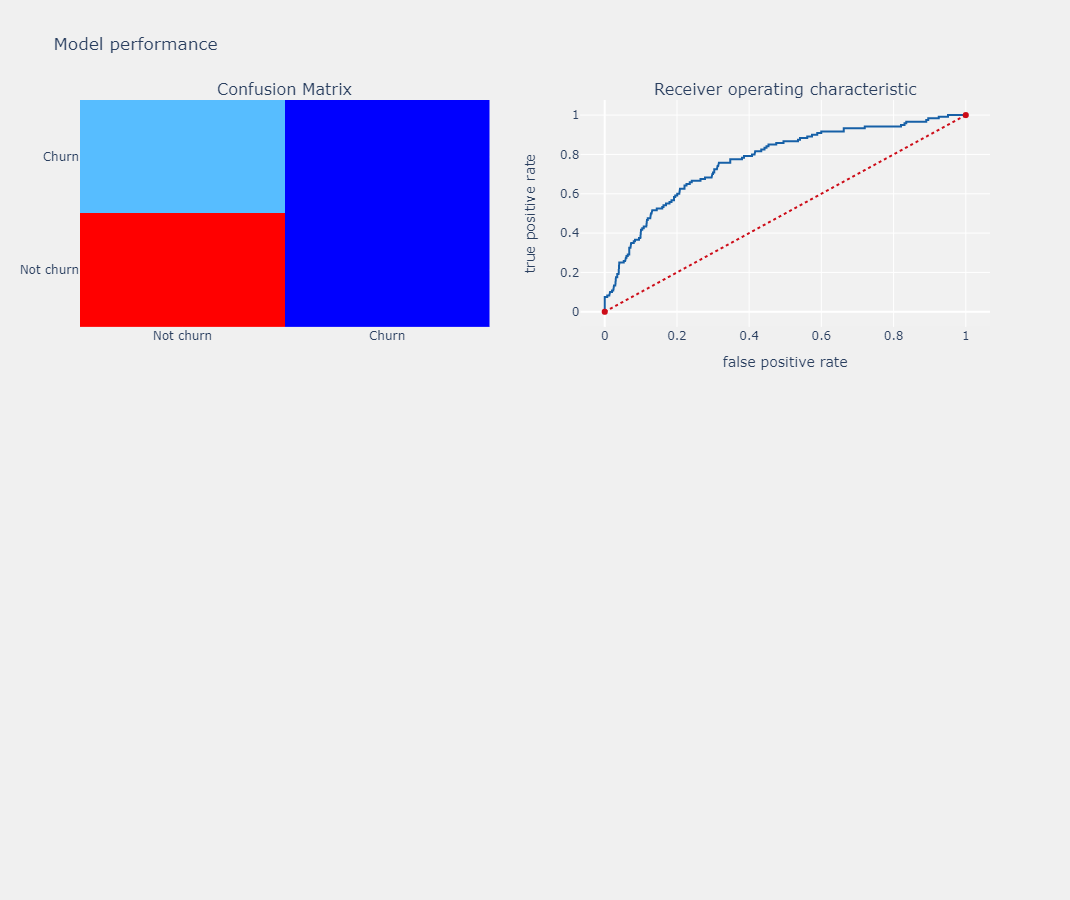

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversio

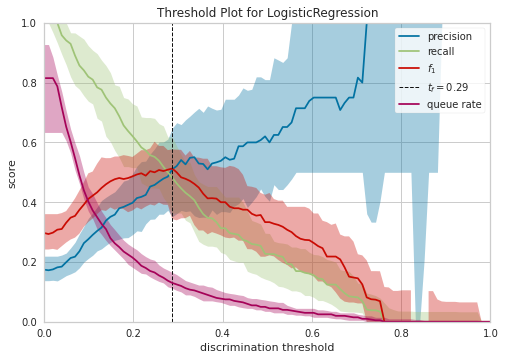

In [13]:
logit  = LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

telecom_churn_prediction(logit,train_X,test_X,train_Y,test_Y,
                         cols,"coefficients",threshold_plot = True)

# DECISION TREE CLASSIFIER

train complete
DecisionTreeClassifier()

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.92      0.92       547
           1       0.65      0.69      0.67       120

    accuracy                           0.88       667
   macro avg       0.79      0.80      0.80       667
weighted avg       0.88      0.88      0.88       667

Accuracy   Score :  0.8770614692653673
Area under curve :  0.8046998781230957 

[[502  45]
 [ 37  83]]


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



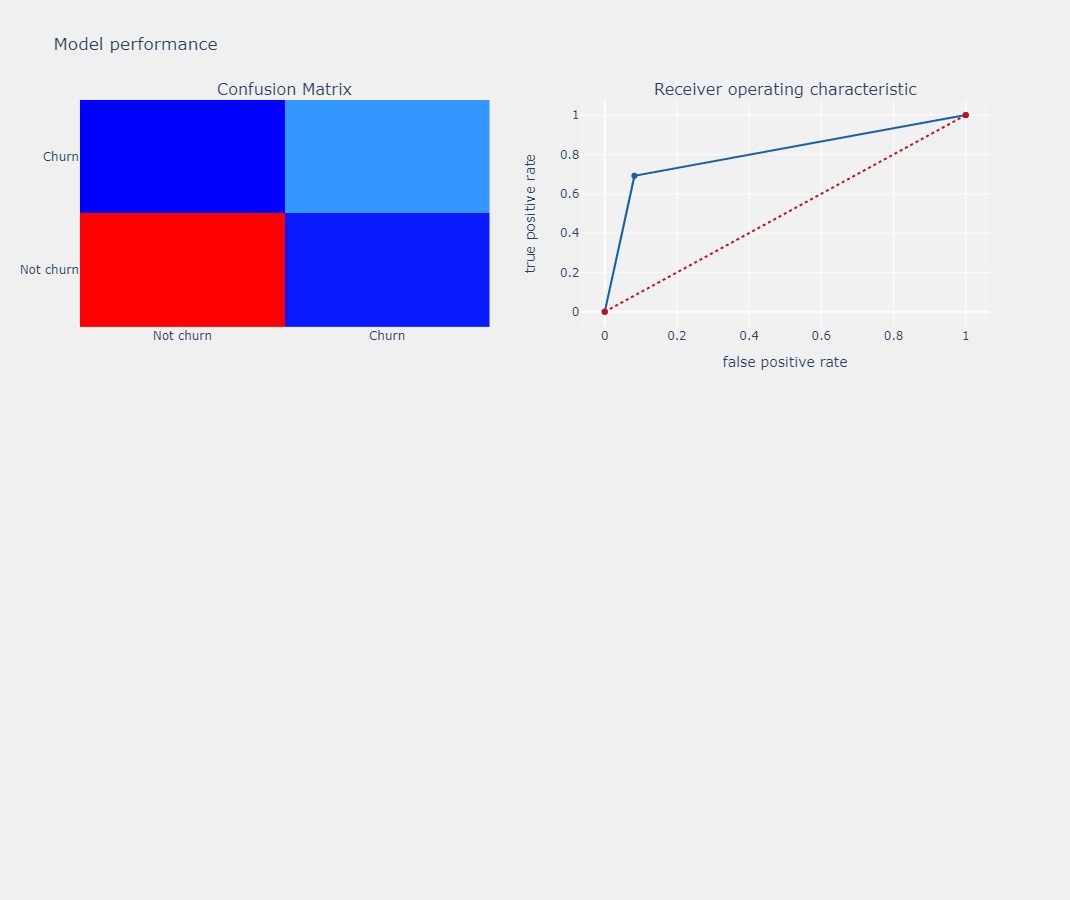

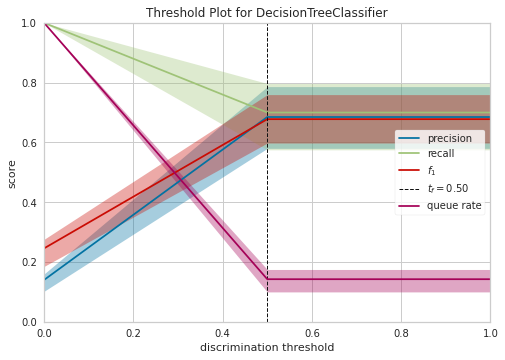

In [5]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"features",threshold_plot = True)


# RANDOM FOREST CLASSIFIER

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:25: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



train complete
RandomForestClassifier(max_depth=2, random_state=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       547
           1       1.00      0.02      0.03       120

    accuracy                           0.82       667
   macro avg       0.91      0.51      0.47       667
weighted avg       0.85      0.82      0.75       667

Accuracy   Score :  0.823088455772114
Area under curve :  0.5083333333333333 

[[547   0]
 [118   2]]


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



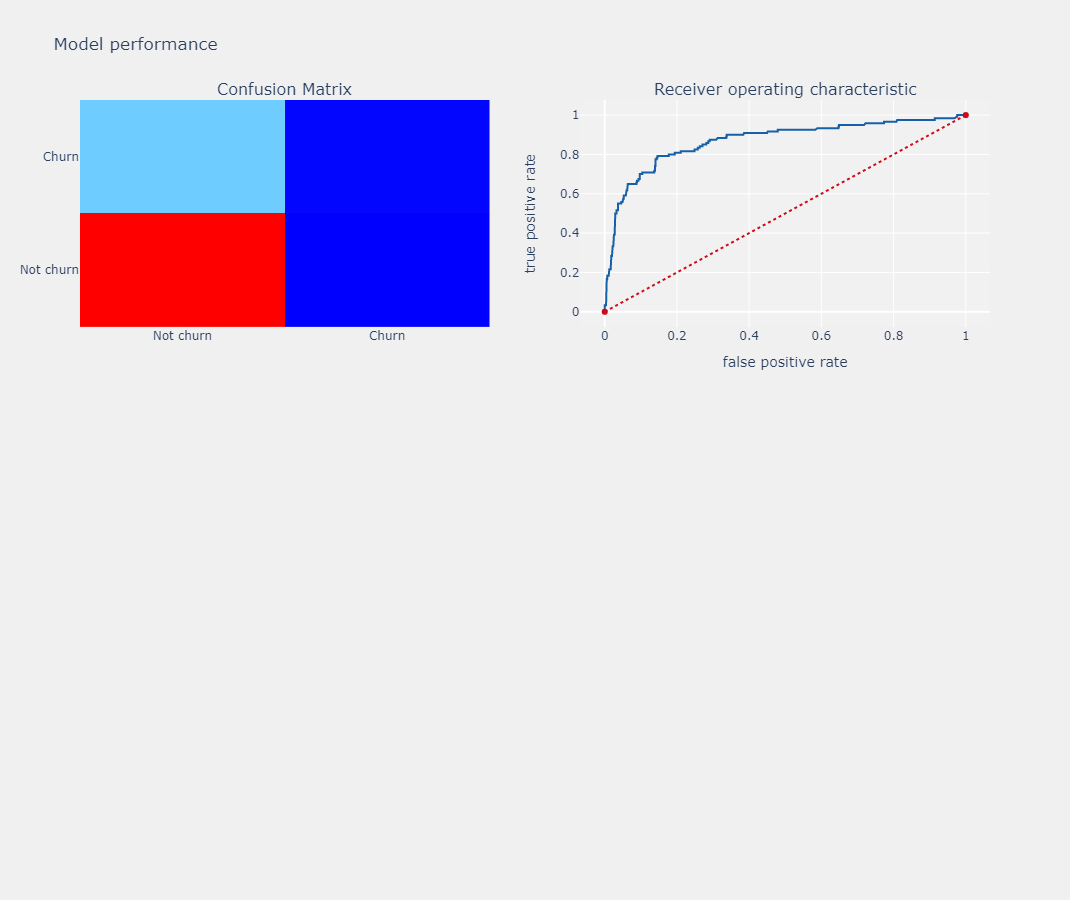

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/threshold.py:339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/threshold.py:339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/threshold.py:339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/yellowbrick/classifier/threshold.py:339: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/yellowbrick/c

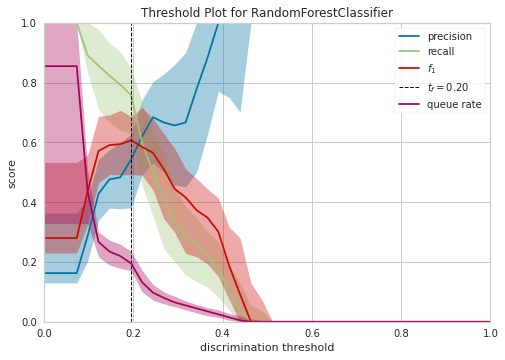

In [6]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=2, random_state=0)
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"features",threshold_plot = True)


train complete
DecisionTreeClassifier(random_state=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.92      0.92      0.92       547
           1       0.64      0.66      0.65       120

    accuracy                           0.87       667
   macro avg       0.78      0.79      0.79       667
weighted avg       0.87      0.87      0.87       667

Accuracy   Score :  0.8725637181409296
Area under curve :  0.7889472882388787 

[[503  44]
 [ 41  79]]


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



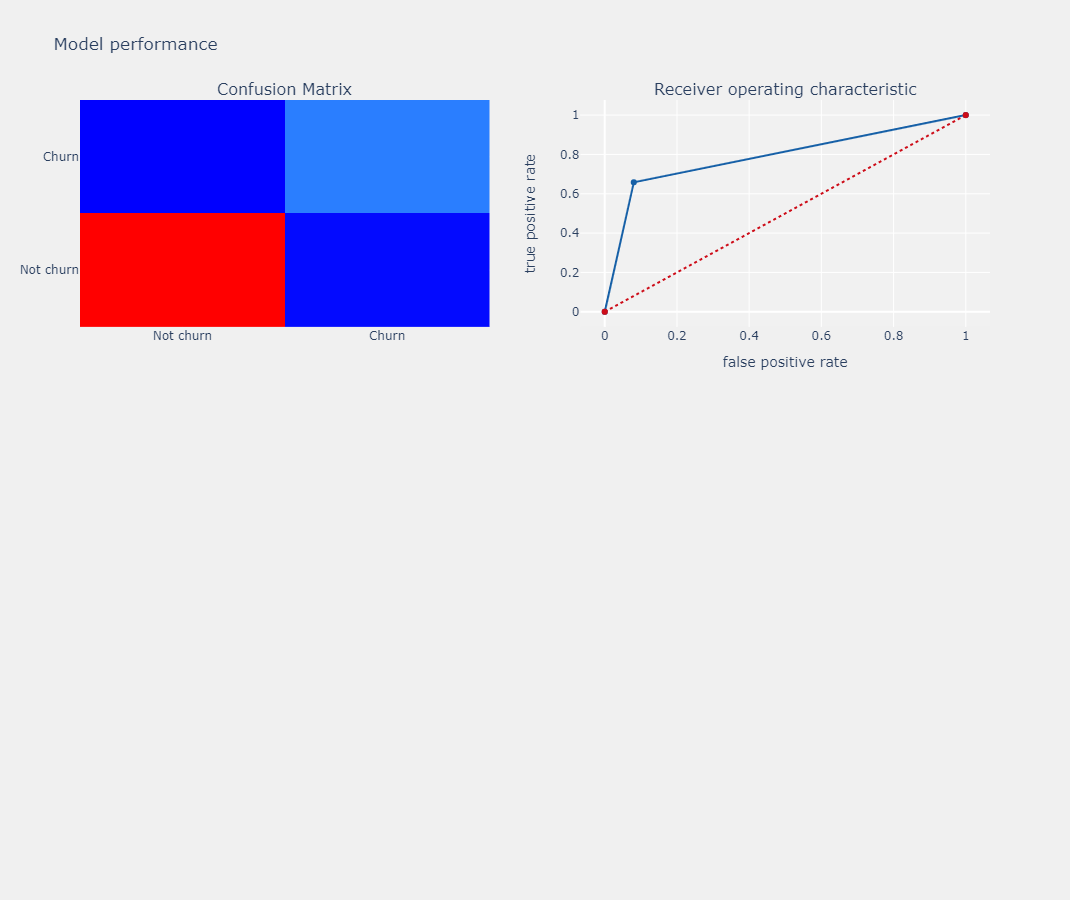

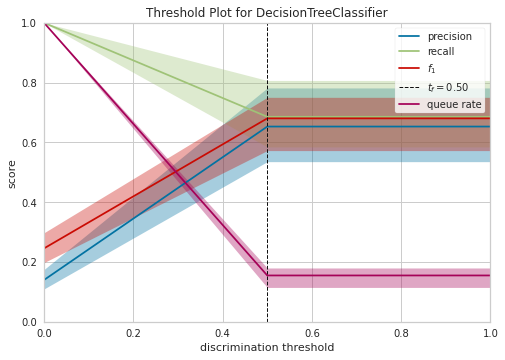

In [7]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"features",threshold_plot = True)


# BAGGING CLASSIFIER

train complete
BaggingClassifier(n_estimators=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95       547
           1       0.83      0.64      0.72       120

    accuracy                           0.91       667
   macro avg       0.88      0.81      0.84       667
weighted avg       0.91      0.91      0.91       667

Accuracy   Score :  0.9115442278860569
Area under curve :  0.8062081048141376 

[[531  16]
 [ 43  77]]


/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



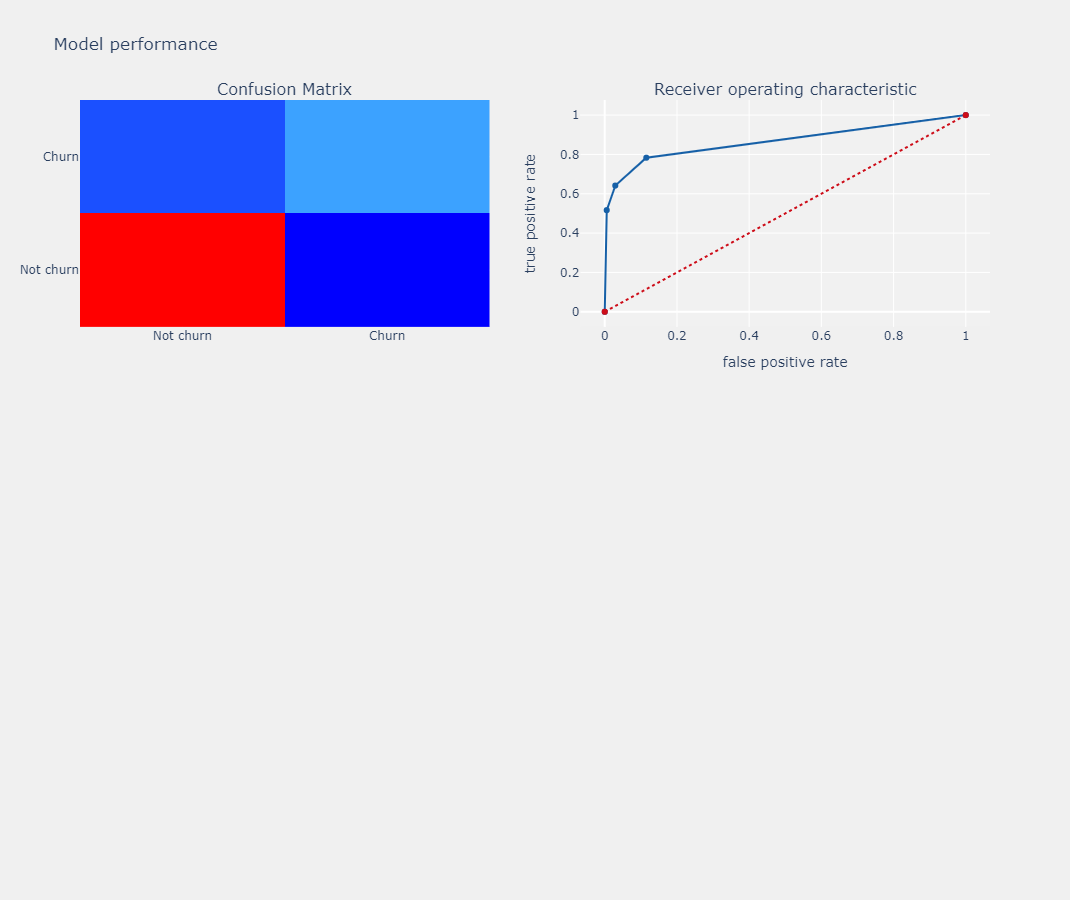

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversio

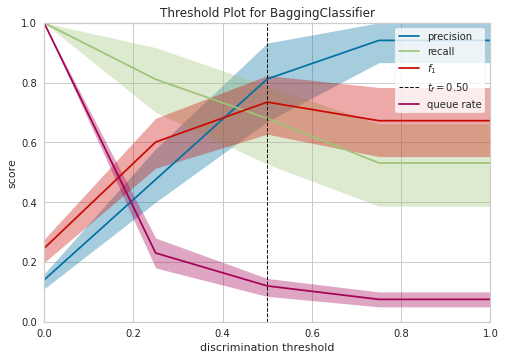

['finalized_model.sav']

In [8]:
from sklearn.ensemble import BaggingClassifier
import joblib
clf=BaggingClassifier(n_estimators=3)
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)
filename = 'finalized_model.sav'
joblib.dump(clf, filename)

# KNN CLASSIFIER

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



train complete
KNeighborsClassifier(n_neighbors=3)

 Classification report : 
               precision    recall  f1-score   support

           0       0.85      0.97      0.91       547
           1       0.61      0.23      0.33       120

    accuracy                           0.84       667
   macro avg       0.73      0.60      0.62       667
weighted avg       0.81      0.84      0.80       667

Accuracy   Score :  0.8350824587706147
Area under curve :  0.5969606946983548 

[[530  17]
 [ 93  27]]


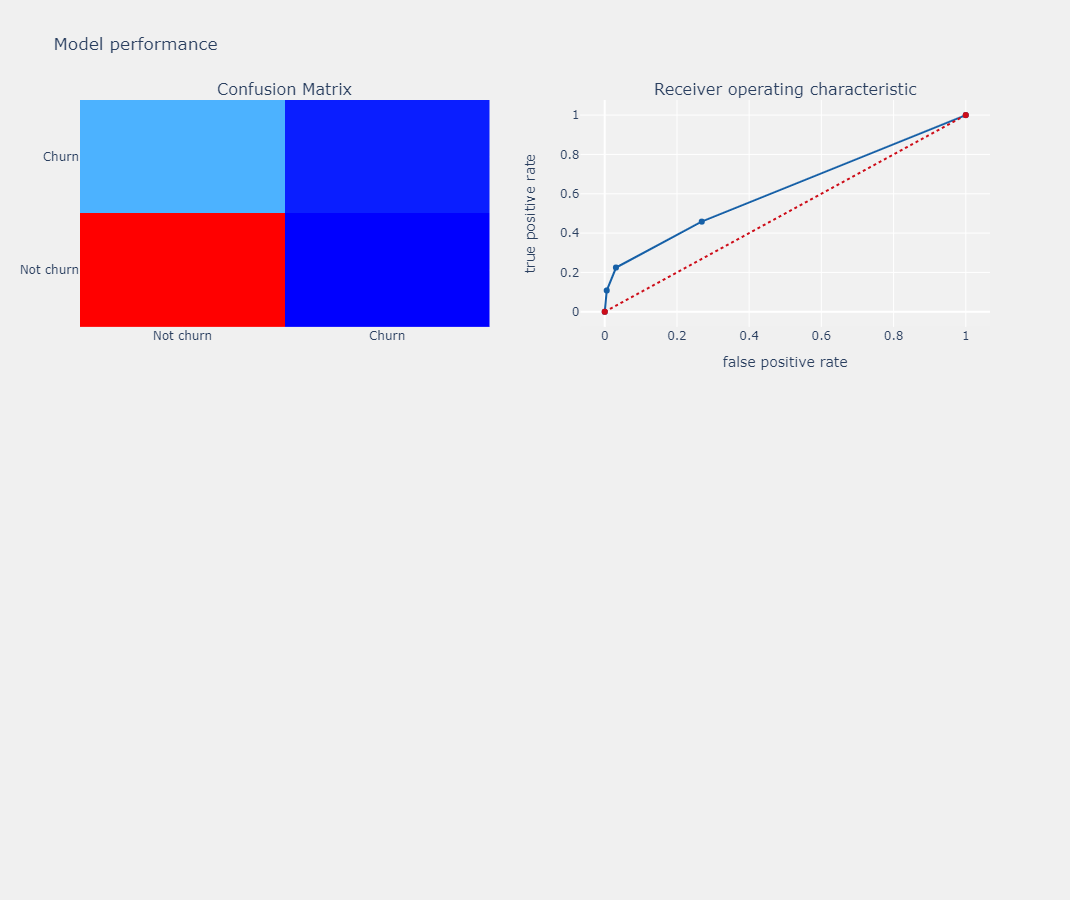

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/neighbors/_classification.py:179: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/n

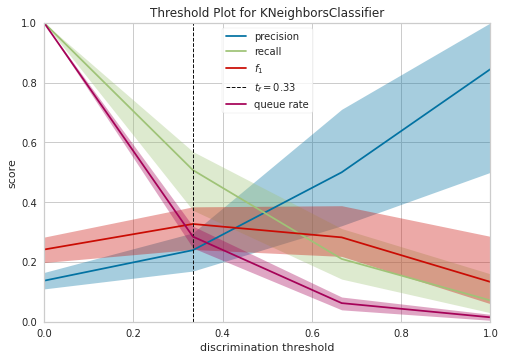

In [9]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=3)
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)


# MLP CLASSIFIER

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



train complete
MLPClassifier(max_iter=300, random_state=1)

 Classification report : 
               precision    recall  f1-score   support

           0       0.86      0.97      0.91       547
           1       0.69      0.28      0.39       120

    accuracy                           0.85       667
   macro avg       0.77      0.62      0.65       667
weighted avg       0.83      0.85      0.82       667

Accuracy   Score :  0.8470764617691154
Area under curve :  0.6237888482632541 

[[532  15]
 [ 87  33]]


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



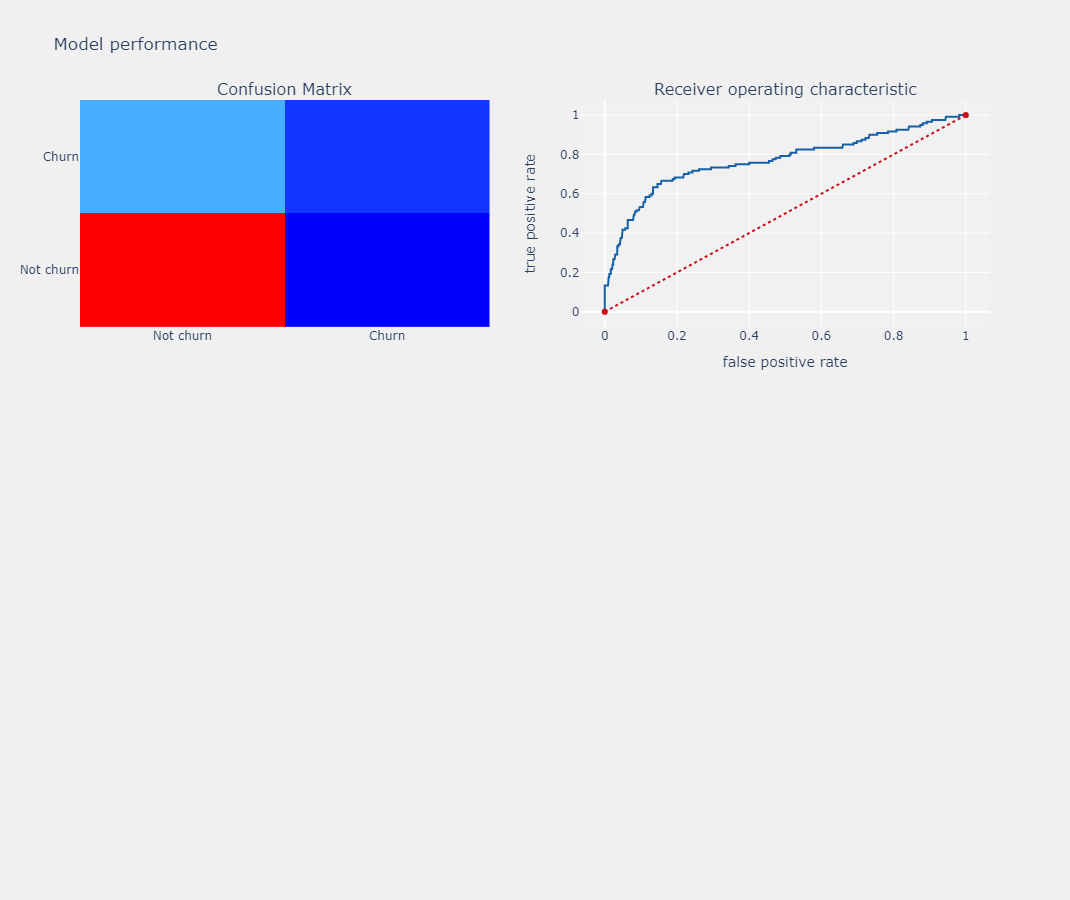

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversio

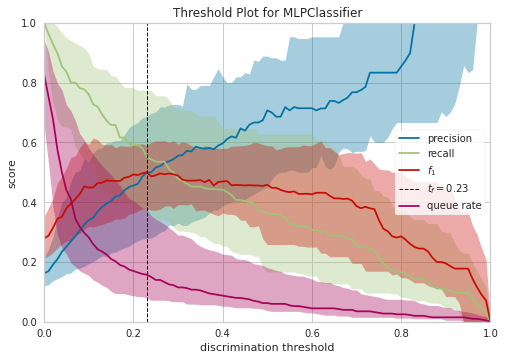

In [10]:
from sklearn.neural_network import MLPClassifier
clf = MLPClassifier(random_state=1, max_iter=300)
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)


# GRADIENT BOOSTING CLASSIFIER

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



train complete
GradientBoostingClassifier(learning_rate=1.0, max_depth=1, random_state=0)

 Classification report : 
               precision    recall  f1-score   support

           0       0.88      0.97      0.92       547
           1       0.72      0.40      0.51       120

    accuracy                           0.86       667
   macro avg       0.80      0.68      0.72       667
weighted avg       0.85      0.86      0.85       667

Accuracy   Score :  0.863568215892054
Area under curve :  0.6826325411334552 

[[528  19]
 [ 72  48]]


/opt/conda/lib/python3.7/site-packages/plotly/tools.py:465: DeprecationWarning:

plotly.tools.make_subplots is deprecated, please use plotly.subplots.make_subplots instead



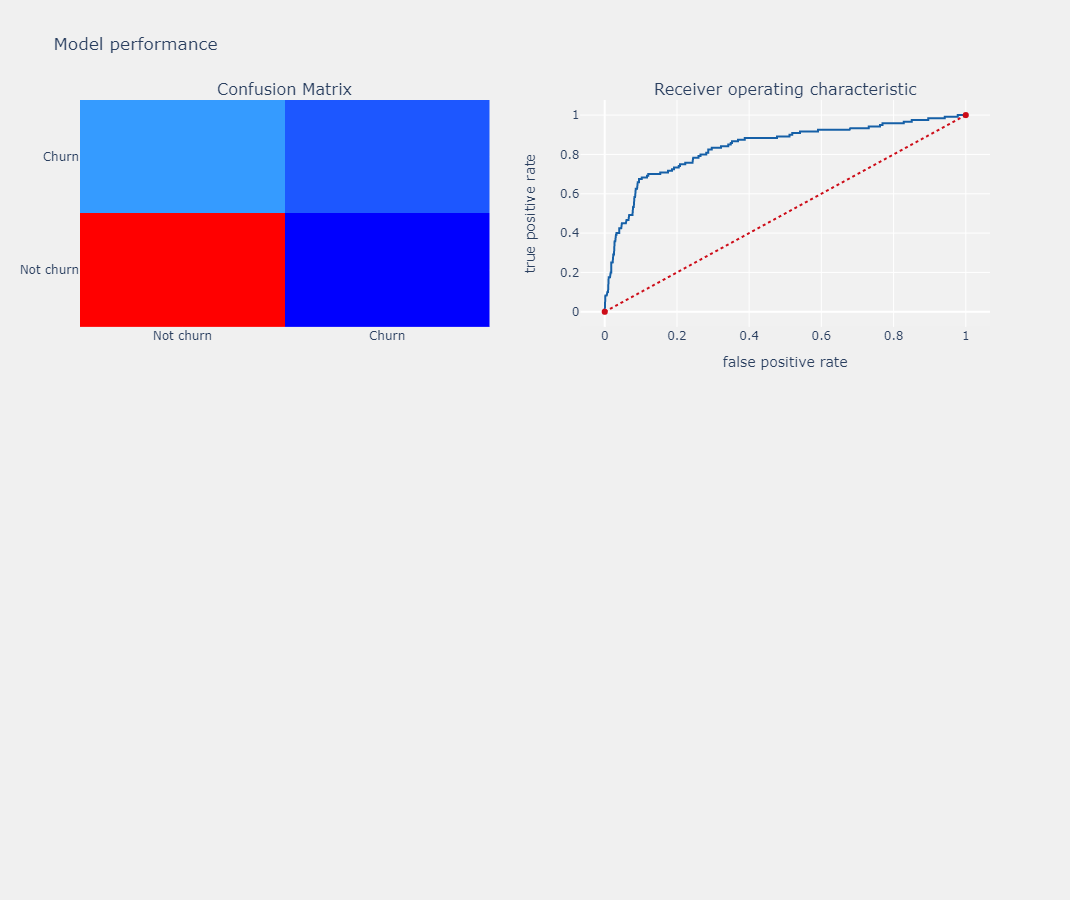

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/opt/conda/lib/python3.7/site-packages/sklearn/utils/validation.py:63: DataConversio

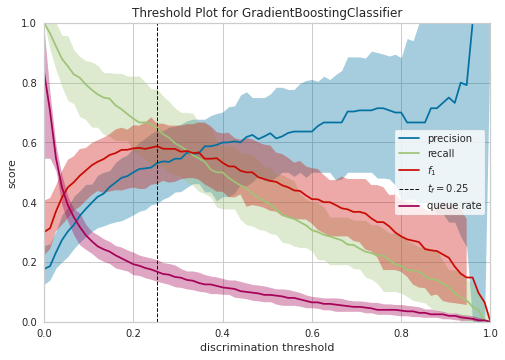

In [11]:
from sklearn.ensemble import GradientBoostingClassifier

clf=GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0)
telecom_churn_prediction(clf,train_X,test_X,train_Y,test_Y,
                         cols,"bag",threshold_plot = True)
